In [59]:
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import math

In [50]:
def obj(c, n):
    return lambda x: -(sum([a**2 for a in x])/n - c**2)

def obj_grad(c, n):
    return lambda x: [-(2*a/n) for a in x]

def find_optimum(c, n, dis=True):
    bounds = Bounds(lb=0, ub=1)
    linear_constraint = LinearConstraint(lb=c*n, ub=c*n,A=[[1 for i in range(n)]])
    x0 = np.random.uniform(0, 1, n)
    x0 = x0/sum(x0)*c
    eq_cons = {'type': 'eq',
           'fun' : lambda x: [sum(x)/n - c],
           'jac' : lambda x: [[1/n for a in x]]}
    res = minimize(obj(c,n), x0, method='SLSQP', jac=obj_grad(c,n),
               constraints=[eq_cons], options={'ftol': 1e-9, 'disp': dis},
               bounds=bounds)
    
    return -(obj(c,n))(res.x), res.x

In [52]:
find_optimum(0.5, 10)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.25
            Iterations: 7
            Function evaluations: 7
            Gradient evaluations: 7


(0.25, array([0., 0., 1., 1., 0., 1., 0., 1., 0., 1.]))

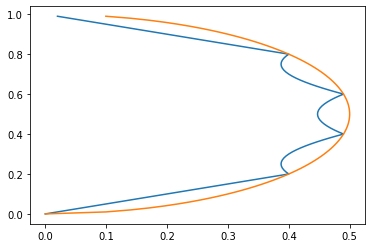

In [85]:
n=5
conf = list(np.arange(0, 1, 0.01))
var_true = [find_optimum(a, n, False)[0] for a in conf]

var_approx = [a - a**2 for a in conf]

plt.plot(np.sqrt(var_true),conf)
plt.plot(np.sqrt(var_approx),conf)
plt.show()

In [108]:
def plot_class(ra, n, separation=0):
    conf = list(np.arange(ra/(3*n), 1/3+2*ra/(3*n), 0.01))
    var_true = [find_optimum(a, n, False)[0]+separation*(ra%3)/n for a in conf]

    var_approx = [a - a**2 for a in conf]

    plt.plot(np.sqrt(var_true),conf)

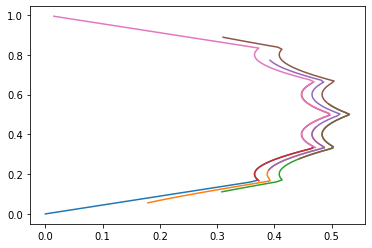

In [109]:
plot_class(0, 6, separation=0.1)
plot_class(1, 6, separation=0.1)
plot_class(2, 6, separation=0.1)
plot_class(3, 6, separation=0.1)
plot_class(4, 6)
plot_class(5, 6)
plot_class(6, 6)